In [37]:
import numpy as np
import cv2
import os
#from sklearn.model_selection import train_test_split
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [38]:

files_train = "./MNIST_Dataset_JPG_format/MNIST_JPG_training"

data_train = []
data_train_label = []


l = -1

for filename in tqdm(listdir(files_train)):
    l = l+1
    for file in listdir(files_train +"/"+ filename):
        image = cv2.imread(files_train +"/"+ filename+'/'+file)
        data_train_label.append(l)
        data_train.append(image)


100%|███████████████████████████████████████████| 10/10 [01:11<00:00,  7.18s/it]


In [39]:
files_test = "./MNIST_Dataset_JPG_format/MNIST_JPG_testing"

data_test = []
data_test_label = []

l = -1
for filename in tqdm(listdir(files_test)):
    l = l+1
    for file in listdir(files_test +"/"+ filename):
        image = cv2.imread(files_test +"/"+ filename+'/'+file)
        data_test_label.append(l)
        data_test.append(image)

100%|███████████████████████████████████████████| 10/10 [00:11<00:00,  1.19s/it]


#### Vérification des valeurs

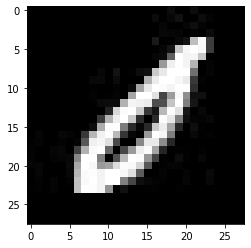

In [40]:
plt.imshow(data_train[24])
plt.show()

In [41]:
data_train_label[24]

0

#### Conversion des listes en np.array

In [42]:
#Jeu d'entrainement
X_train = np.array(data_train)

#Jeu de test
X_test = np.array(data_test)

type(X_train)


numpy.ndarray

In [45]:
# y_train
y_train = np.asarray(data_train_label)
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)


# y_test
y_test = np.asarray(data_test_label)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

y_train_categorical

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

#### Normalize pixel values to be between 0 and 1

In [46]:
X_train, X_test = X_train / 255, X_test / 255

In [47]:
X_train[0].shape

(28, 28, 3)

In [48]:
X_train[0].max()

1.0

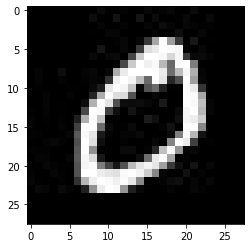

In [12]:
plt.imshow(X_train[0])
plt.show()

In [49]:
X_train.shape

(60000, 28, 28, 3)

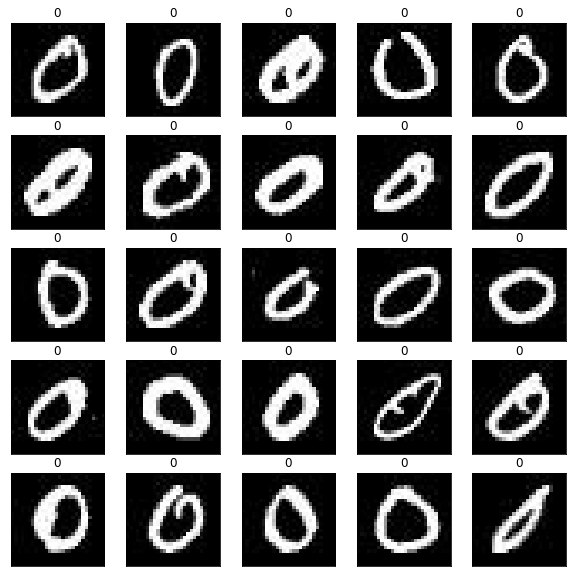

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.title(y_train[i])
plt.show()

In [51]:
shape_image = X_train[0].shape
shape_image

(28, 28, 3)

#### Définition du modèle avec les convolutions et les pools

In [52]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=shape_image))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

#### Transformation de l'image en vecteur (flatten) et ajout des hidden layers (dense)

In [53]:
#Conversion en vecteur
model.add(layers.Flatten())

#Ajout des hidden layers
model.add(layers.Dense(64, activation = 'sigmoid')) # 64 neurones avec la fonction d'activation sigmoid
model.add(layers.Dense(10))


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

#### Compiler et entrainer le modèle

In [63]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

history = model.fit(X_train, y_train_categorical, epochs = 10, validation_split = 0.2)


Epoch 1/10
1875/1875 [==============================] - 108s 56ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0308 - val_accuracy: 0.9900
Epoch 2/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.0315 - val_accuracy: 0.9899
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0304 - val_accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0369 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.0348 - val_accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0353 - val_accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0

<ipython-input-64-d244700583d6>:3: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'lower_right')


Text(0, 0.5, 'loss')

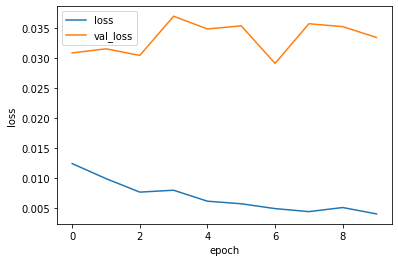

In [64]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'lower_right')
plt.xlabel('epoch')
plt.ylabel('loss')

313/313 - 5s - loss: 0.0334 - accuracy: 0.9912 - 5s/epoch - 16ms/step


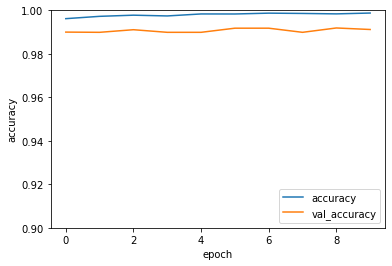

In [67]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose = 2)

In [68]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = -1)

In [69]:
y_prob[0]

array([12.207993 , -5.916935 , -4.1216903, -9.943579 , -9.681486 ,
       -5.3682127, -4.9872622, -5.056184 , -1.9748901, -2.770869 ],
      dtype=float32)

In [70]:
y_pred[0]

0

#### Matrice de confusion

In [71]:
confusion_matrice = tf.math.confusion_matrix(
    y_test,
    y_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

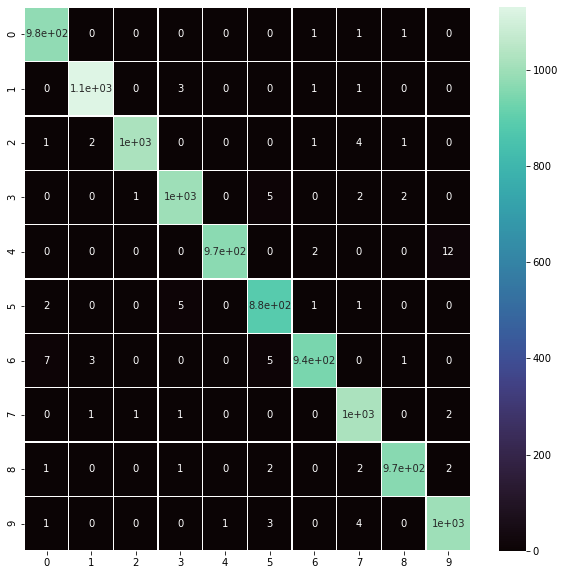

In [72]:
plt.figure(figsize=(10,10))

sns.heatmap(confusion_matrice, annot=True,cmap='mako', linecolor='white', linewidths=.3)

#### Test

In [29]:
lst_file = listdir()

In [73]:
image_test = cv2.imread("quatre.png")
image = np.expand_dims(np.array(image_test), axis = 0)/255
image.shape

(1, 28, 28, 3)

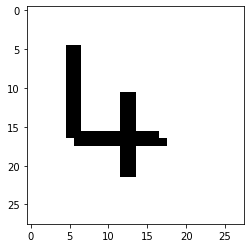

In [75]:
plt.imshow(image_test)
plt.show()

In [76]:
prob = model.predict(image)
print(prob)
prediction = prob.argmax(axis = -1)
print(f'Prediction = {prediction}')

[[ -0.12030368  -2.2572773  -12.1508255   -8.607472    -4.929679
    4.356761    -9.606726    -5.8062835   -3.6006575   -1.5705693 ]]
Prediction = [5]
